### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading the data into dataframe

In [2]:
df=pd.read_csv("simple_loan_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
percentage_missing=df.isna().sum()*100/len(df)
percentage_missing

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [6]:
missing_values_df=pd.DataFrame({"percentage_missing":percentage_missing,
                                "number_of_missing_values":df.isna().sum()})
missing_values_df

,percentage_missing,number_of_missing_values
Loan_ID,0.000000,0
Gender,2.117264,13
Married,0.488599,3
Dependents,2.442997,15
Education,0.000000,0
Self_Employed,5.211726,32
ApplicantIncome,0.000000,0
CoapplicantIncome,0.000000,0
LoanAmount,3.583062,22
Loan_Amount_Term,2.280130,14


In [7]:
new_df=df.sort_values("Loan_Status")
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N
489,LP002556,Male,No,0,Graduate,No,2435,0.0,75.0,360.0,1.0,Urban,N
186,LP001641,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,N
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
486,LP002545,Male,No,2,Graduate,No,3547,0.0,80.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,LP001788,Female,No,0,Graduate,Yes,3463,0.0,122.0,360.0,NaN,Urban,Y
235,LP001784,Male,Yes,1,Graduate,No,5500,1260.0,170.0,360.0,1.0,Rural,Y
234,LP001778,Male,Yes,1,Graduate,No,3155,1779.0,140.0,360.0,1.0,Semiurban,Y
252,LP001841,Male,No,0,Not Graduate,Yes,2583,2167.0,104.0,360.0,1.0,Rural,Y


<AxesSubplot:>

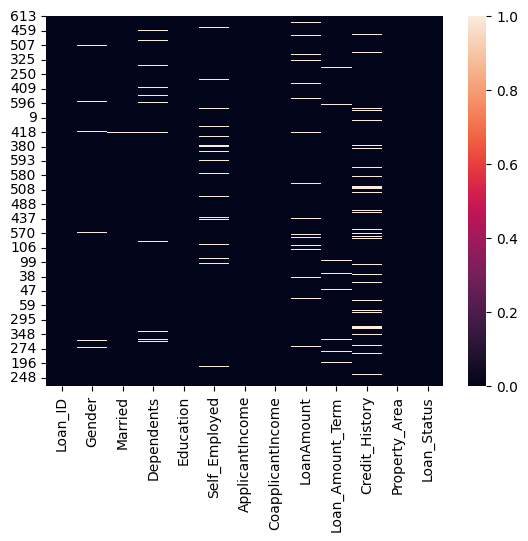

In [8]:
sns.heatmap(new_df.isna())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
categorical_columns=["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status"]
categorical_columns

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [11]:
for column in categorical_columns:
    print(f"value counts of {column}: ")
    print(df[column].value_counts())
    print()

value counts of Gender: 
Male      489
Female    112
Name: Gender, dtype: int64

value counts of Married: 
Yes    398
No     213
Name: Married, dtype: int64

value counts of Education: 
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

value counts of Self_Employed: 
No     500
Yes     82
Name: Self_Employed, dtype: int64

value counts of Property_Area: 
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

value counts of Loan_Status: 
Y    422
N    192
Name: Loan_Status, dtype: int64



In [12]:
for column in categorical_columns:
    print(f"value counts of {column}: ")
    print(df[column].nunique())
    print()

value counts of Gender: 
2

value counts of Married: 
2

value counts of Education: 
2

value counts of Self_Employed: 
2

value counts of Property_Area: 
3

value counts of Loan_Status: 
2



### Handling Null values

In [13]:
df["Gender"].mode()[0]

'Male'

In [14]:
df["Gender"].fillna(df.Gender.mode()[0],inplace=True)

In [15]:
df["Married"].fillna(df.Gender.mode()[0],inplace=True)

In [16]:
df["Dependents"].fillna(df.Gender.mode()[0],inplace=True)

In [17]:
df["Self_Employed"].fillna(df.Gender.mode()[0],inplace=True)

In [18]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Handling null values in loan_amount

In [19]:
df.groupby("Loan_Status").get_group("N")["LoanAmount"].mean()

151.22099447513813

In [20]:
df.groupby("Loan_Status").get_group("Y")["LoanAmount"].mean()

144.29440389294405

In [21]:
mean_loan_amount_N=df.groupby("Loan_Status").get_group("N")["LoanAmount"].mean()

In [22]:
mean_loan_amount_Y=df.groupby("Loan_Status").get_group("Y")["LoanAmount"].mean()

In [23]:
df.loc[df["Loan_Status"]=="N","LoanAmount"]=df.loc[df["Loan_Status"]=="N","LoanAmount"].fillna(mean_loan_amount_N)

In [24]:
df.loc[df["Loan_Status"]=="Y","LoanAmount"]=df.loc[df["Loan_Status"]=="Y","LoanAmount"].fillna(mean_loan_amount_Y)

In [25]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [27]:
df.Loan_Amount_Term.mode()[0]

360.0

In [28]:
df["Loan_Amount_Term"].fillna(df.Loan_Amount_Term.mode()[0],inplace=True)

In [29]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [31]:
df["Credit_History"].fillna(df.Credit_History.mode()[0],inplace=True)

In [32]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Checking the Outliers

<AxesSubplot:>

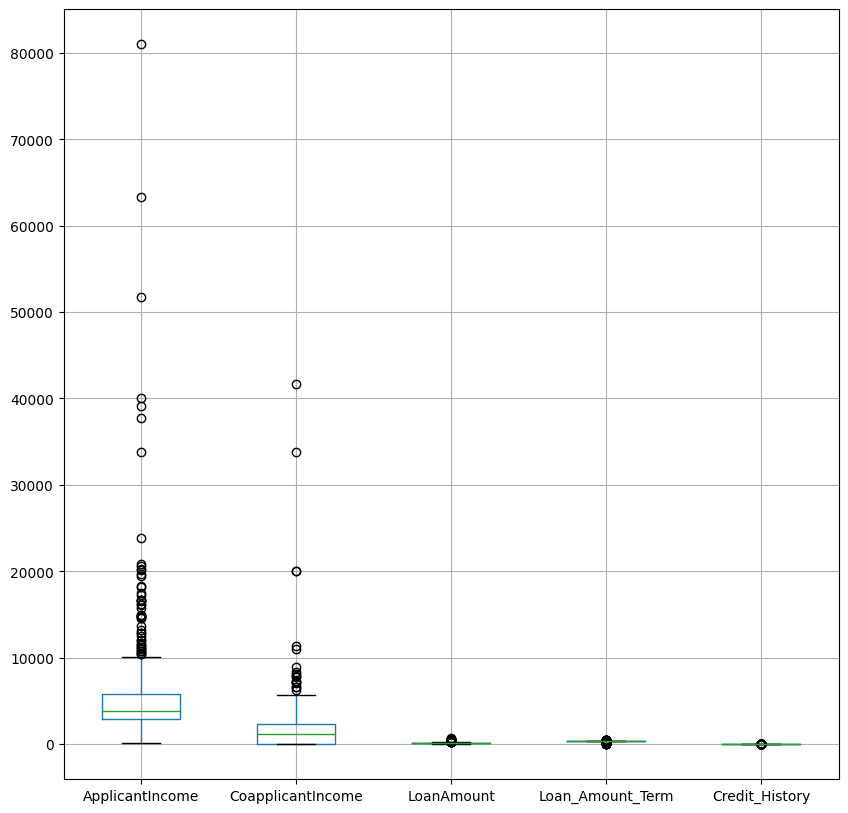

In [33]:
plt.figure(figsize=(10,10))
df.boxplot()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

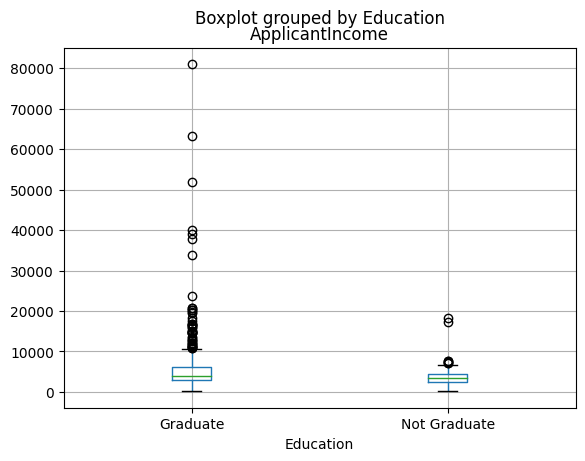

In [34]:
df.boxplot(column="ApplicantIncome",by="Education")

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Loan_Status'>

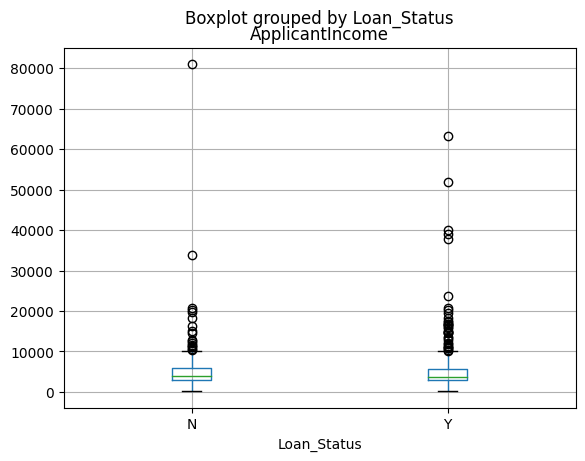

In [35]:
df.boxplot(column="ApplicantIncome",by="Loan_Status")

<AxesSubplot:>

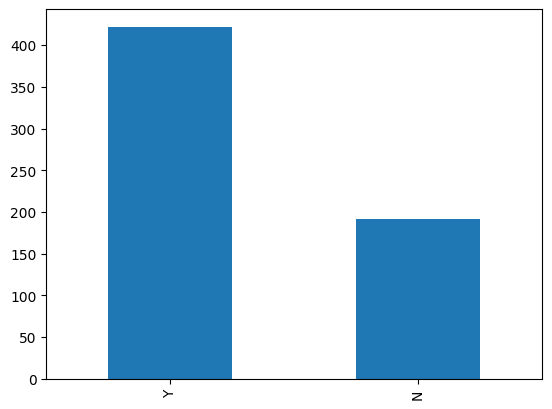

In [36]:
df["Loan_Status"].value_counts().plot(kind="bar")

<AxesSubplot:>

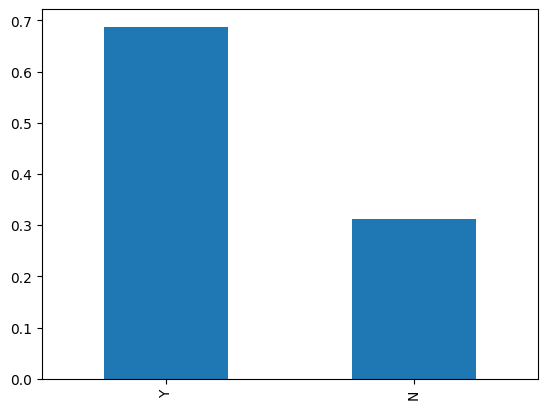

In [37]:
df["Loan_Status"].value_counts(normalize=True).plot(kind="bar")

<AxesSubplot:xlabel='Gender'>

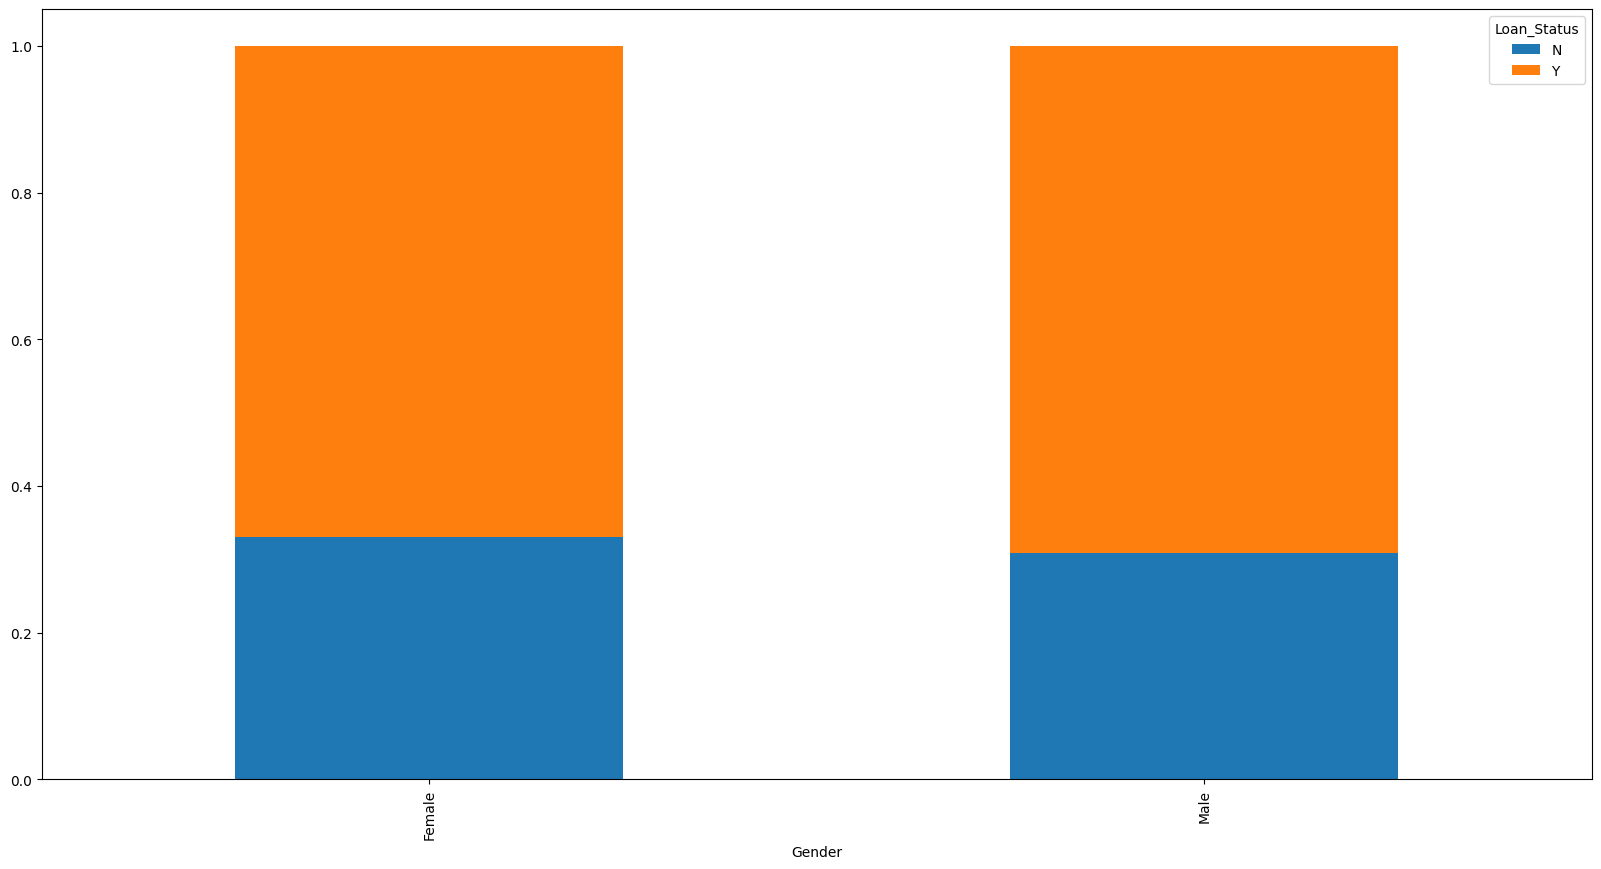

In [38]:
gender=pd.crosstab(df.Gender,df.Loan_Status)
gender.div(gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(20,10))

<AxesSubplot:xlabel='Gender'>

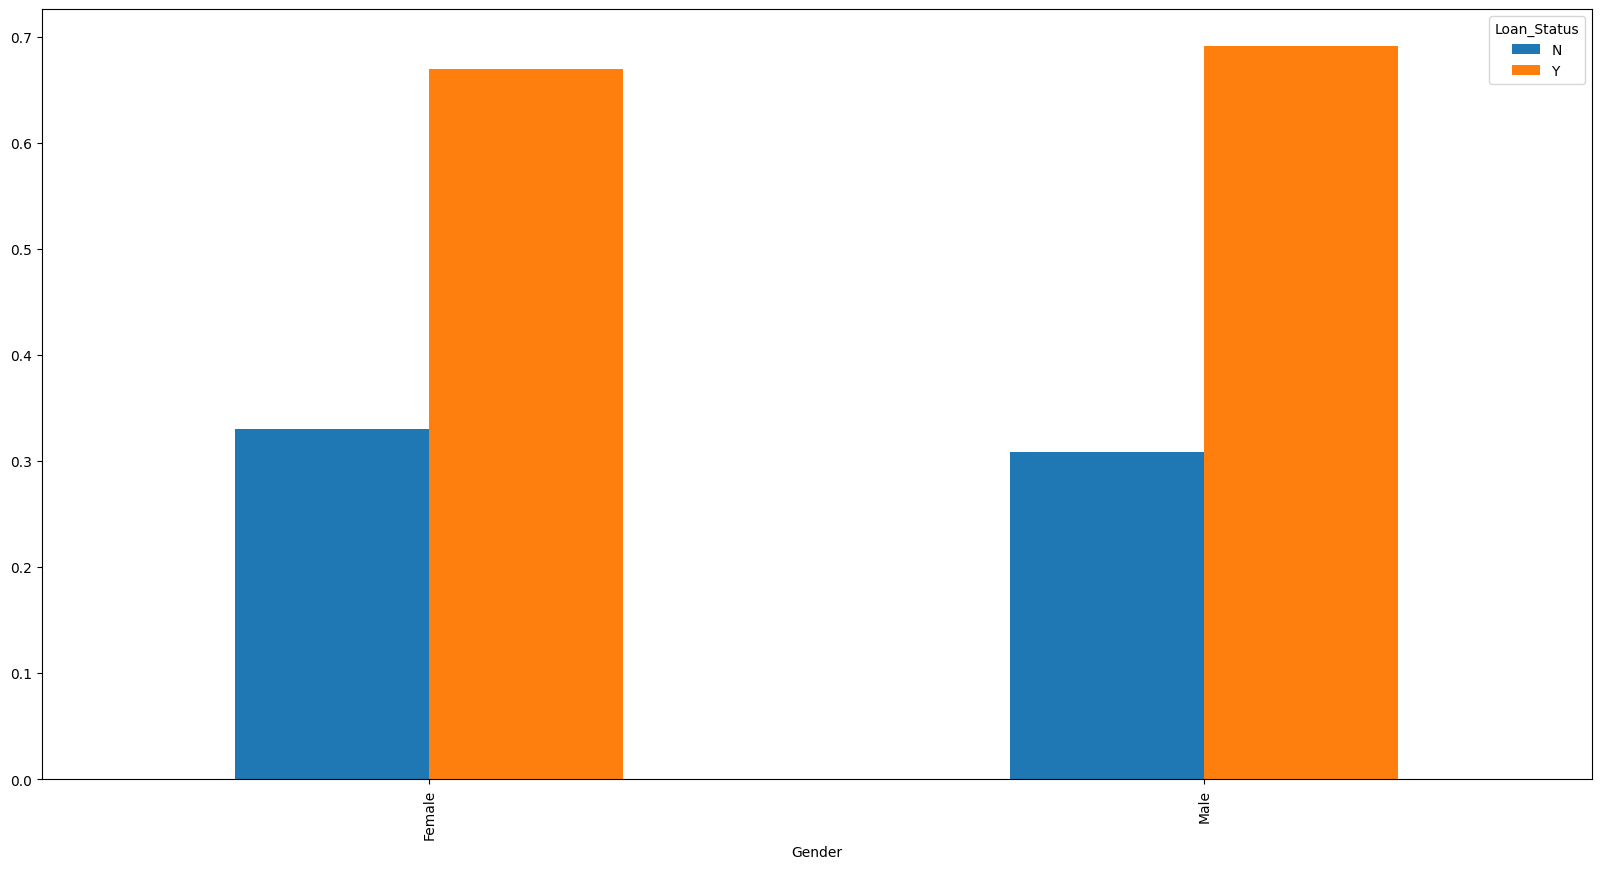

In [39]:
gender=pd.crosstab(df.Gender,df.Loan_Status)
gender.div(gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=False,figsize=(20,10))

In [40]:
df.groupby(["Gender","Loan_Status"]).agg({"Loan_ID":"count"})

Loan_ID
Gender Loan_Status         
Female N                 37
       Y                 75
Male   N                155
       Y                347

<AxesSubplot:xlabel='Dependents'>

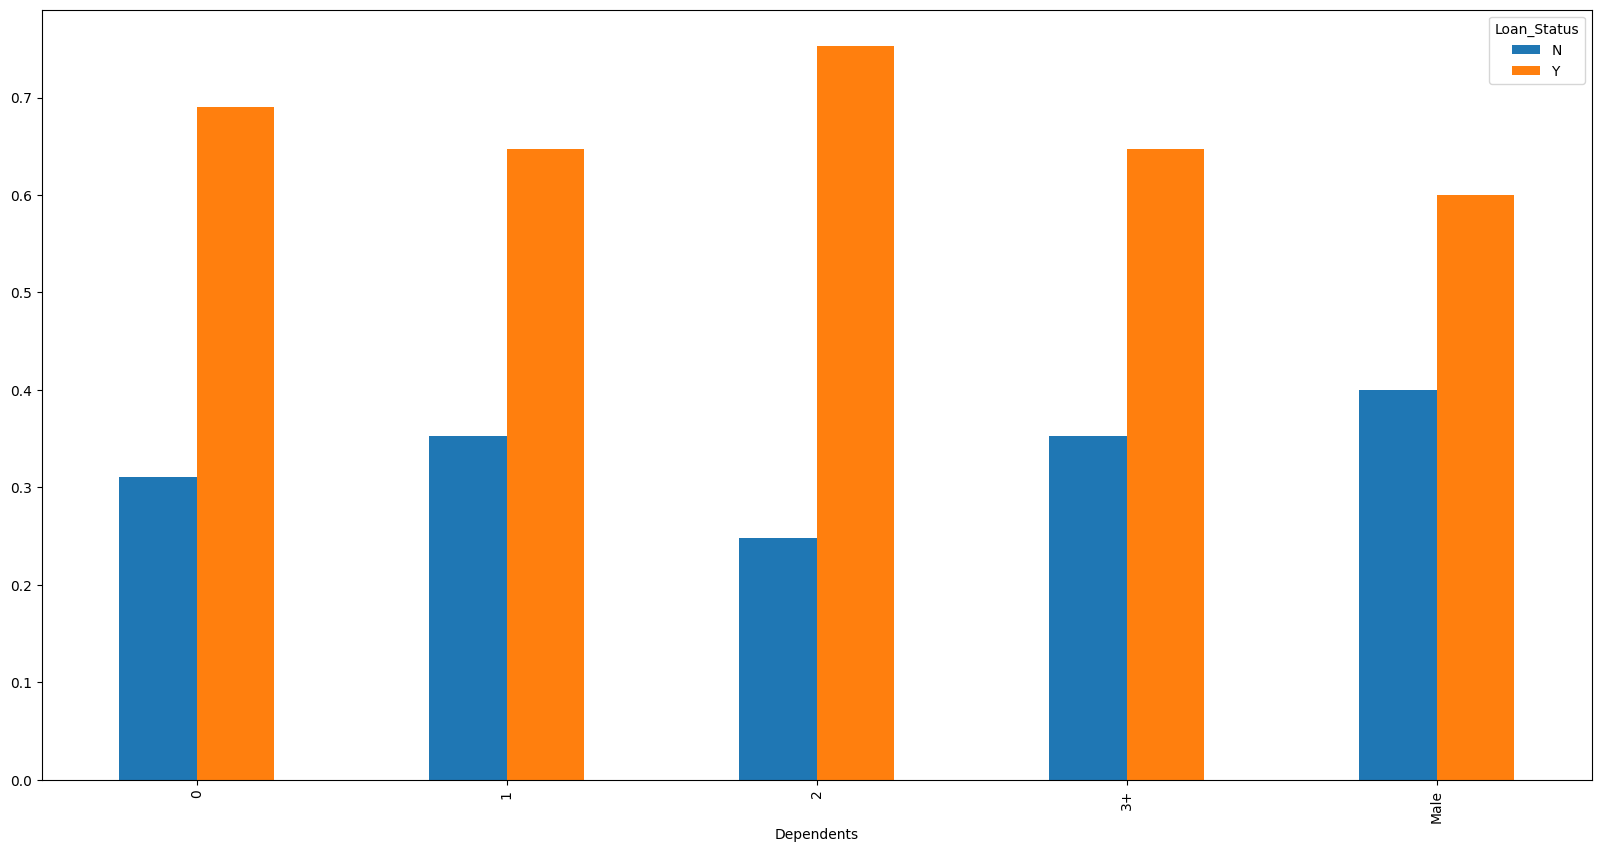

In [41]:
gender=pd.crosstab(df.Dependents,df.Loan_Status)
gender.div(gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=False,figsize=(20,10))

### Encoding

In [42]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,144.294404,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [43]:
df["Gender"].value_counts().to_dict()

{'Male': 502, 'Female': 112}

In [44]:
df["Gender"].replace({'Male':1, 'Female':0},inplace=True)

In [47]:
df["Dependents"].value_counts().to_dict()

{'0': 345, '1': 102, '2': 101, '3+': 51, 'Male': 15}

In [49]:
df["Dependents"].replace({'0':0, '1': 1, '2': 2, '3+':3,'Male': 4},inplace=True)

In [50]:
df["Education"].value_counts().to_dict()

{'Graduate': 480, 'Not Graduate': 134}

In [51]:
df["Education"].replace({'Graduate': 1, 'Not Graduate': 0},inplace=True)

In [52]:
df["Self_Employed"].value_counts().to_dict()

{'No': 500, 'Yes': 82, 'Male': 32}

In [53]:
df["Self_Employed"].replace({'No': 0, 'Yes': 1, 'Male': 2},inplace=True)

In [55]:
df['Married'].value_counts().to_dict()

{1: 398, 0: 213, 'Male': 3}

In [58]:
df['Married'].replace({'Yes': 1, 'No': 0,'Male': 2},inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(6), object(3)
memory usage: 62.5+ KB


In [61]:
df['Property_Area'].value_counts().to_dict()

{'Semiurban': 233, 'Urban': 202, 'Rural': 179}

In [62]:
df['Property_Area'].replace({'Semiurban': 1, 'Urban': 2, 'Rural': 0},inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


In [64]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,144.294404,360.0,1.0,2,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,Y
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,Y


### Train Test Split

In [66]:
from sklearn.model_selection import train_test_split

In [65]:
x=df.drop(["Loan_ID","Loan_Status"],axis=1)
y=df["Loan_Status"]

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30,stratify=y)

### Logistic_regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
logistic_clf=LogisticRegression()
logistic_clf.fit(x_train,y_train)

LogisticRegression()

### Evaluation

In [72]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [74]:
#training_data evaluation
y_pred_train=logistic_clf.predict(x_train)

logistic_confusion_matrix=confusion_matrix(y_pred_train,y_train)
print("the confusion matrix is: \n",logistic_confusion_matrix)

logistic_accuracy_score=accuracy_score(y_pred_train,y_train)
print("the accuracy score is: ",logistic_accuracy_score)

logistic_classificaation_report=classification_report(y_pred_train,y_train)
print("the classification report is: \n",logistic_classificaation_report)

the confusion matrix is: 
 [[ 71   6]
 [ 83 331]]
the accuracy score is:  0.8187372708757638
the classification report is: 
               precision    recall  f1-score   support

           N       0.46      0.92      0.61        77
           Y       0.98      0.80      0.88       414

    accuracy                           0.82       491
   macro avg       0.72      0.86      0.75       491
weighted avg       0.90      0.82      0.84       491



In [75]:
#testing_data evaluation
y_pred_test=logistic_clf.predict(x_test)

logistic_confusion_matrix=confusion_matrix(y_pred_test,y_test)
print("the confusion matrix is: \n",logistic_confusion_matrix)

logistic_accuracy_score=accuracy_score(y_pred_test,y_test)
print("the accuracy score is: ",logistic_accuracy_score)

logistic_classificaation_report=classification_report(y_pred_test,y_test)
print("the classification report is: \n",logistic_classificaation_report)

the confusion matrix is: 
 [[15  2]
 [23 83]]
the accuracy score is:  0.7967479674796748
the classification report is: 
               precision    recall  f1-score   support

           N       0.39      0.88      0.55        17
           Y       0.98      0.78      0.87       106

    accuracy                           0.80       123
   macro avg       0.69      0.83      0.71       123
weighted avg       0.90      0.80      0.82       123



### KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [79]:
std_scaler=StandardScaler()
std_scaler.fit(x_train)

StandardScaler()

In [80]:
x_train_std = std_scaler.fit_transform(x_train)
x_test_std = std_scaler.transform(x_test)

In [81]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train_std,y_train)

KNeighborsClassifier()

In [86]:
#training_data evaluation
y_pred_train=knn_model.predict(x_train)

knn_confusion_matrix=confusion_matrix(y_pred_train,y_train)
print("the confusion matrix is: \n",knn_confusion_matrix)

knn_accuracy_score=accuracy_score(y_pred_train,y_train)
print("the accuracy score is: ",knn_accuracy_score)

knn_classificaation_report=classification_report(y_pred_train,y_train)
print("the classification report is: \n",knn_classificaation_report)

the confusion matrix is: 
 [[ 13  17]
 [141 320]]
the accuracy score is:  0.6782077393075356
the classification report is: 
               precision    recall  f1-score   support

           N       0.08      0.43      0.14        30
           Y       0.95      0.69      0.80       461

    accuracy                           0.68       491
   macro avg       0.52      0.56      0.47       491
weighted avg       0.90      0.68      0.76       491



In [85]:
#testing_data evaluation
y_pred_test=knn_model.predict(x_test)

knn_confusion_matrix=confusion_matrix(y_pred_test,y_test)
print("the confusion matrix is: \n",knn_confusion_matrix)

knn_accuracy_score=accuracy_score(y_pred_test,y_test)
print("the accuracy score is: ",knn_accuracy_score)

knn_classificaation_report=classification_report(y_pred_test,y_test)
print("the classification report is: \n",knn_classificaation_report)

the confusion matrix is: 
 [[ 2  4]
 [36 81]]
the accuracy score is:  0.6747967479674797
the classification report is: 
               precision    recall  f1-score   support

           N       0.05      0.33      0.09         6
           Y       0.95      0.69      0.80       117

    accuracy                           0.67       123
   macro avg       0.50      0.51      0.45       123
weighted avg       0.91      0.67      0.77       123



### Decision_tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [89]:
#training_data evaluation
y_pred_train=dt_model.predict(x_train)

dt_confusion_matrix=confusion_matrix(y_pred_train,y_train)
print("the confusion matrix is: \n",dt_confusion_matrix)

dt_accuracy_score=accuracy_score(y_pred_train,y_train)
print("the accuracy score is: ",dt_accuracy_score)

dt_classificaation_report=classification_report(y_pred_train,y_train)
print("the classification report is: \n",dt_classificaation_report)

the confusion matrix is: 
 [[154   0]
 [  0 337]]
the accuracy score is:  1.0
the classification report is: 
               precision    recall  f1-score   support

           N       1.00      1.00      1.00       154
           Y       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [90]:
#testing_data evaluation
y_pred_test=dt_model.predict(x_test)

dt_confusion_matrix=confusion_matrix(y_pred_test,y_test)
print("the confusion matrix is: \n",dt_confusion_matrix)

dt_accuracy_score=accuracy_score(y_pred_test,y_test)
print("the accuracy score is: ",dt_accuracy_score)

dt_classificaation_report=classification_report(y_pred_test,y_test)
print("the classification report is: \n",dt_classificaation_report)

the confusion matrix is: 
 [[24 24]
 [14 61]]
the accuracy score is:  0.6910569105691057
the classification report is: 
               precision    recall  f1-score   support

           N       0.63      0.50      0.56        48
           Y       0.72      0.81      0.76        75

    accuracy                           0.69       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.68      0.69      0.68       123



In [91]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [92]:
dt_model = DecisionTreeClassifier()
hyp = { 'criterion':['gini','entropy'],
      'max_depth':np.arange(2,10),
      'min_samples_split':np.arange(2,10),
      'min_samples_leaf':np.arange(2,10)
      }

rscv_model = RandomizedSearchCV(dt_model,hyp,random_state=10 , cv = 5 )
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=10)

In [93]:
rscv_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       min_samples_split=9)

In [94]:
dt_model=DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,min_samples_split=9)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       min_samples_split=9)

In [95]:
#training_data evaluation
y_pred_train=dt_model.predict(x_train)

dt_confusion_matrix=confusion_matrix(y_pred_train,y_train)
print("the confusion matrix is: \n",dt_confusion_matrix)

dt_accuracy_score=accuracy_score(y_pred_train,y_train)
print("the accuracy score is: ",dt_accuracy_score)

dt_classificaation_report=classification_report(y_pred_train,y_train)
print("the classification report is: \n",dt_classificaation_report)

the confusion matrix is: 
 [[ 68   6]
 [ 86 331]]
the accuracy score is:  0.8126272912423625
the classification report is: 
               precision    recall  f1-score   support

           N       0.44      0.92      0.60        74
           Y       0.98      0.79      0.88       417

    accuracy                           0.81       491
   macro avg       0.71      0.86      0.74       491
weighted avg       0.90      0.81      0.84       491



In [96]:
#testing_data evaluation
y_pred_test=dt_model.predict(x_test)

dt_confusion_matrix=confusion_matrix(y_pred_test,y_test)
print("the confusion matrix is: \n",dt_confusion_matrix)

dt_accuracy_score=accuracy_score(y_pred_test,y_test)
print("the accuracy score is: ",dt_accuracy_score)

dt_classificaation_report=classification_report(y_pred_test,y_test)
print("the classification report is: \n",dt_classificaation_report)

the confusion matrix is: 
 [[14  1]
 [24 84]]
the accuracy score is:  0.7967479674796748
the classification report is: 
               precision    recall  f1-score   support

           N       0.37      0.93      0.53        15
           Y       0.99      0.78      0.87       108

    accuracy                           0.80       123
   macro avg       0.68      0.86      0.70       123
weighted avg       0.91      0.80      0.83       123



### Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [99]:
#training_data evaluation
y_pred_train=rf_model.predict(x_train)

rf_confusion_matrix=confusion_matrix(y_pred_train,y_train)
print("the confusion matrix is: \n",rf_confusion_matrix)

rf_accuracy_score=accuracy_score(y_pred_train,y_train)
print("the accuracy score is: ",rf_accuracy_score)

rf_classificaation_report=classification_report(y_pred_train,y_train)
print("the classification report is: \n",rf_classificaation_report)

the confusion matrix is: 
 [[154   0]
 [  0 337]]
the accuracy score is:  1.0
the classification report is: 
               precision    recall  f1-score   support

           N       1.00      1.00      1.00       154
           Y       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [100]:
#testing_data evaluation
y_pred_test=rf_model.predict(x_test)

rf_confusion_matrix=confusion_matrix(y_pred_test,y_test)
print("the confusion matrix is: \n",rf_confusion_matrix)

rf_accuracy_score=accuracy_score(y_pred_test,y_test)
print("the accuracy score is: ",rf_accuracy_score)

rf_classificaation_report=classification_report(y_pred_test,y_test)
print("the classification report is: \n",rf_classificaation_report)

the confusion matrix is: 
 [[16  6]
 [22 79]]
the accuracy score is:  0.7723577235772358
the classification report is: 
               precision    recall  f1-score   support

           N       0.42      0.73      0.53        22
           Y       0.93      0.78      0.85       101

    accuracy                           0.77       123
   macro avg       0.68      0.75      0.69       123
weighted avg       0.84      0.77      0.79       123



In [101]:
rf_model = RandomForestClassifier()
hyp = { 'criterion':['gini','entropy'],
      'max_depth':np.arange(2,10),
      'min_samples_split':np.arange(2,10),
      'min_samples_leaf':np.arange(2,10),
       'n_estimators':np.arange(60,120)
      }

rscv_model_rf = RandomizedSearchCV(rf_model,hyp,random_state=10 , cv=5)
rscv_model_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119])},
                   random_state=10)

In [102]:
rscv_model_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=101)

In [103]:
rf_model=RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,min_samples_split=5, n_estimators=101)
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=101)

In [104]:
#training_data evaluation
y_pred_train=rf_model.predict(x_train)

rf_confusion_matrix=confusion_matrix(y_pred_train,y_train)
print("the confusion matrix is: \n",rf_confusion_matrix)

rf_accuracy_score=accuracy_score(y_pred_train,y_train)
print("the accuracy score is: ",rf_accuracy_score)

rf_classificaation_report=classification_report(y_pred_train,y_train)
print("the classification report is: \n",rf_classificaation_report)

the confusion matrix is: 
 [[ 68   6]
 [ 86 331]]
the accuracy score is:  0.8126272912423625
the classification report is: 
               precision    recall  f1-score   support

           N       0.44      0.92      0.60        74
           Y       0.98      0.79      0.88       417

    accuracy                           0.81       491
   macro avg       0.71      0.86      0.74       491
weighted avg       0.90      0.81      0.84       491



In [105]:
#testing_data evaluation
y_pred_test=rf_model.predict(x_test)

rf_confusion_matrix=confusion_matrix(y_pred_test,y_test)
print("the confusion matrix is: \n",rf_confusion_matrix)

rf_accuracy_score=accuracy_score(y_pred_test,y_test)
print("the accuracy score is: ",rf_accuracy_score)

rf_classificaation_report=classification_report(y_pred_test,y_test)
print("the classification report is: \n",rf_classificaation_report)

the confusion matrix is: 
 [[14  1]
 [24 84]]
the accuracy score is:  0.7967479674796748
the classification report is: 
               precision    recall  f1-score   support

           N       0.37      0.93      0.53        15
           Y       0.99      0.78      0.87       108

    accuracy                           0.80       123
   macro avg       0.68      0.86      0.70       123
weighted avg       0.91      0.80      0.83       123



In [106]:
import pickle

In [107]:
pickle.dump(rscv_model_rf,open('rf_model.pkl','wb'))

In [113]:
input_data=(1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0)

# for i in input_data:
#   loan_data.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
#                       'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

# changing the input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

# Reshape the numpy array
numpy_array_reshaped=input_data_as_numpy_array.reshape(1,-1)

#prediction of data
prediction=rf_model.predict(numpy_array_reshaped)
print(prediction)

if(prediction=="Y"):
  print("loan_passed")
else:
  print("loan_rejected")

['Y']
loan_passed
